## 타이타닉 데이터셋 불러오기 및 전처리

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

titanic = sns.load_dataset('titanic') 

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### 필요없는 데이터 제거

- sex 와 who가 겹치므로 **who 삭제**

- **adult_male** 은 age로 구분이 가능하며 잘못된 데이터가 눈에 보이므로 삭제

- **deck** 는 대략 4분의3정도가 누락 되어 있으므로 삭제

- **alive** 는 survived와 같은 맥락이므로 삭제
- **embarked** 는 embark_town과 같은 것이므로 삭제

In [3]:
titanic = titanic.drop(['who','adult_male','deck','alive','embarked'], axis = 1)
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   embark_town  889 non-null    object  
 9   alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(2)
memory usage: 57.7+ KB


In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,True
887,1,1,female,19.0,0,0,30.0000,First,Southampton,True
888,0,3,female,NaN,1,2,23.4500,Third,Southampton,False
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,True


### 가설 세우기
- 첫 번째, 상대적으로 약자인 여성과 아이들을 먼저 대피시켰을것이다, 따라서 여성과 아이들의 생존이 높을것이다
- 두 번째, 높은 등급(pclass)의 사람일 수록 타이타닉직원들이 우선적으로 도왔을 것이다.
- 세 번째, 나이가 20 ~ 30 대가 가장 신체기능이 활발하므로 많이 생존 했을 것이다.
- 네 번째, 동승자 수가 많을수록 서로 의지 하며 생존했을 확률이 높을 것이다.
- 다섯 번째, 상대적으로 북쪽에 있는 도시가 생존을 더 많이 했을것이다.(Queenstown -> Southampton -> Cherbourg)

### 첫 번째

In [35]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

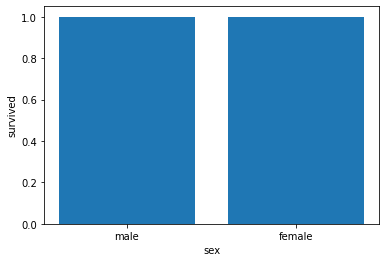

In [34]:
# 성별에 따른 생존률

x = 'sex'
y = 'survived'

plt.bar(x, y , data = titanic)
plt.xlabel('sex')
plt.ylabel('survived')
plt.tight_layout
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


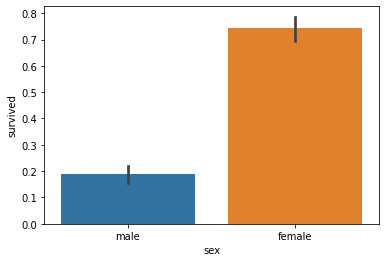

In [36]:
import seaborn as sns
sns.barplot(x, y, data = titanic)
plt.show()

### 두 번째

### 세 번째

네 번째

### 다섯 번째